# Agrupamiento Espectral con el Dataset de Vinos
Vamos en este ejercicio a retomar la baase de datos de vinos empleada en la práctica 2 de agrupamiento jerárquico. Si recordáis, es un Dataset que posee 3 clases de vinos descritos por diferentes características físicas (color) y organolépticas (alcohol, acido málico...).  Usando el agrupamiento jerárquico no salió demasiado bien la separación de las 3 clases con nigun 'linkage'.
Vamos a estudiar el Dataset con la técnica de agrupamiento espectral para comparar el resultado.

Vamos a proceder exactamente igual que como la Parte 1 de esta práctica.Vamos a desarrollar el agrupamiento espectral por nosotros/as mismo/as

Vamos a cargar de nuevo el Dataset

In [30]:
import sys
import pandas as pd



from sklearn import preprocessing


data = pd.read_csv("wine.csv")
#Daros cuenta de que en el csv los datos estan ordenados por tipo de vino (primero Barolo luego Grignolino...)



print(data.head())

#Obtenemos los datos brutos sin etiquetas de 'ground truth'
#es decir obtenemos las columnas de datos 'alcohol','malic_acid' ...
data_raw = data.drop(['class_label', 'class_name'], axis = 1)

#obtenemos las etiquetas (ground truth)
#es decir ,la columna 'class_label'
labels = data['class_label']

#la convertimos en un array
wlabels=labels.to_numpy()

wlabels = wlabels.flatten()

data_nump =  data_raw.to_numpy()

#Preprocesado. Vamos a normalizar los datos
min_max_scaler = preprocessing.MinMaxScaler()
wines_minmax = min_max_scaler.fit_transform(data_nump)

   class_label class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0            1     Barolo    14.23        1.71  2.43               15.6   
1            1     Barolo    13.20        1.78  2.14               11.2   
2            1     Barolo    13.16        2.36  2.67               18.6   
3            1     Barolo    14.37        1.95  2.50               16.8   
4            1     Barolo    13.24        2.59  2.87               21.0   

   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0        127           2.80        3.06                  0.28   
1        100           2.65        2.76                  0.26   
2        101           2.80        3.24                  0.30   
3        113           3.85        3.49                  0.24   
4        118           2.80        2.69                  0.39   

   proanthocyanins  color_intensity   hue  od280  proline  
0             2.29             5.64  1.04   3.92     1065  
1             1.28             4.38  1

Vamos ahora a obtener el grafo y la matriz de adyacencia del mismo

In [31]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse


data_df = wines_minmax
#numero de vecinos
nn=8
# Adjacency Matrix.
connectivity = kneighbors_graph(X=data_df, n_neighbors=nn, mode='connectivity')
print(connectivity)
adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
print("-------")
print()
print(adjacency_matrix_s)

  (0, 20)	1.0
  (0, 56)	1.0
  (0, 40)	1.0
  (0, 22)	1.0
  (0, 54)	1.0
  (0, 29)	1.0
  (0, 9)	1.0
  (0, 6)	1.0
  (1, 38)	1.0
  (1, 29)	1.0
  (1, 22)	1.0
  (1, 54)	1.0
  (1, 23)	1.0
  (1, 26)	1.0
  (1, 27)	1.0
  (1, 44)	1.0
  (2, 55)	1.0
  (2, 48)	1.0
  (2, 30)	1.0
  (2, 51)	1.0
  (2, 57)	1.0
  (2, 35)	1.0
  (2, 10)	1.0
  (2, 12)	1.0
  (3, 52)	1.0
  :	:
  (174, 165)	1.0
  (175, 149)	1.0
  (175, 166)	1.0
  (175, 176)	1.0
  (175, 174)	1.0
  (175, 148)	1.0
  (175, 167)	1.0
  (175, 144)	1.0
  (175, 156)	1.0
  (176, 153)	1.0
  (176, 175)	1.0
  (176, 148)	1.0
  (176, 154)	1.0
  (176, 166)	1.0
  (176, 174)	1.0
  (176, 168)	1.0
  (176, 172)	1.0
  (177, 156)	1.0
  (177, 174)	1.0
  (177, 148)	1.0
  (177, 166)	1.0
  (177, 155)	1.0
  (177, 173)	1.0
  (177, 172)	1.0
  (177, 165)	1.0
-------

  (0, 39)	0.5
  (0, 7)	0.5
  (0, 6)	0.5
  (0, 9)	0.5
  (0, 29)	0.5
  (0, 54)	0.5
  (0, 22)	1.0
  (0, 40)	1.0
  (0, 56)	1.0
  (0, 20)	1.0
  (1, 44)	0.5
  (1, 27)	1.0
  (1, 26)	0.5
  (1, 23)	0.5
  (1, 54)	0.5
  (1,

**Cuestión 0:** ¿qué técnica has usado para generar el grafo?

**Respuesta:** <font color = 'blue'> Hemos usado la técnica de los K-vecinos más próximos. </font>

Calculamos ahora la matriz laplaciana y la visualizamos con un mapa de calor

  (0, 39)	-0.5
  (0, 7)	-0.5
  (0, 6)	-0.5
  (0, 9)	-0.5
  (0, 29)	-0.5
  (0, 54)	-0.5
  (0, 22)	-1.0
  (0, 40)	-1.0
  (0, 56)	-1.0
  (0, 20)	-1.0
  (1, 44)	-0.5
  (1, 27)	-1.0
  (1, 26)	-0.5
  (1, 23)	-0.5
  (1, 54)	-0.5
  (1, 22)	-1.0
  (1, 29)	-0.5
  (1, 38)	-1.0
  (2, 50)	-0.5
  (2, 12)	-0.5
  (2, 10)	-0.5
  (2, 35)	-0.5
  (2, 57)	-0.5
  (2, 51)	-1.0
  (2, 30)	-1.0
  :	:
  (153, 153)	7.5
  (154, 154)	6.5
  (155, 155)	7.5
  (156, 156)	10.5
  (157, 157)	5.0
  (158, 158)	4.5
  (159, 159)	4.5
  (160, 160)	6.5
  (161, 161)	9.0
  (162, 162)	9.5
  (163, 163)	11.0
  (164, 164)	9.0
  (165, 165)	11.0
  (166, 166)	10.5
  (167, 167)	10.5
  (168, 168)	10.0
  (169, 169)	5.0
  (170, 170)	11.5
  (171, 171)	7.5
  (172, 172)	9.5
  (173, 173)	7.5
  (174, 174)	15.5
  (175, 175)	8.0
  (176, 176)	8.5
  (177, 177)	6.5


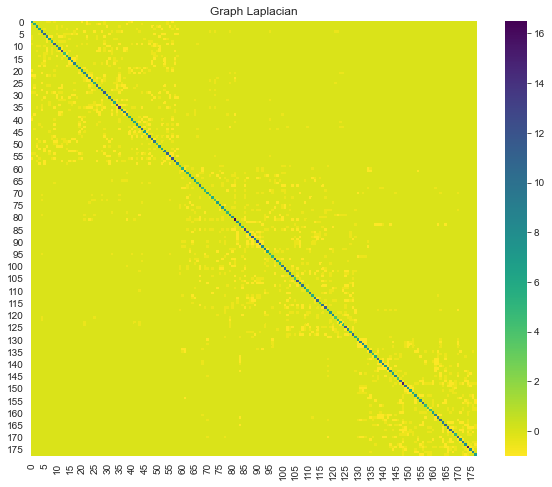

In [32]:
#librerías y configuración para los gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

# Graph Laplacian.
graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
graph_laplacian = graph_laplacian_s.toarray()
    
# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

print(graph_laplacian_s)

**Cuestión 1:** Observa que, aunque es una matriz dispersa, entorno a la diagonal principal hay una organización de valores en tres cuadrados que no son ceros (valores en amarillo (negativos)). Aunque es un poco premeditado avanzar un diagnóstico ¿Consideras que esto es un buen síntoma o un mal síntoma del futuro agrupamiento (Nota: la situación es en parte semejante a la descrita en las diapositivas de teoria 14 y 15)

**Respuesta:** <font color = 'blue'> Esa organización entorno a la diagonal principal, nos indica que hay 3 componentes conexas en el grafo. Esto es buena señal, ya que nuestro conjunto de datos consta de 3 clases. </font>

Vamos a hora a calcular los autovalores y autovectores de la matriz

In [33]:
from scipy import linalg
import numpy as np

eigenvals, eigenvcts = linalg.eig(graph_laplacian)

Como sabemos, al ser la matriz laplaciana de un grafo simétrica y semidefinida positiva, sus autovalores son valores reales y además tienen valor cero y valores positivos. Vamos a comprobarlo tambien para este Dataset.
Primero comprobamos que el único valor que aparecen la parte imaginaria de los autovalores son 0 (lo que indica que son reales).

In [34]:
np.unique(np.imag(eigenvals))

array([0.])

Una vez comprobado, eliminamos la parte compleja.

In [35]:
eigenvals = np.real(eigenvals)
eigenvcts = np.real(eigenvcts)

Ordenamos los autovalores por valor creciente

In [36]:
from sklearn.preprocessing import normalize


eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

#Sacamos el grado de multiplicidad del autovalor de valor 0
zero_eigenvals_index = np.argwhere(abs(eigenvals_sorted) < 1e-5)
print(zero_eigenvals_index )
print("***************")



[[0]]
***************


Visualizamos los autovalores en una gráfica

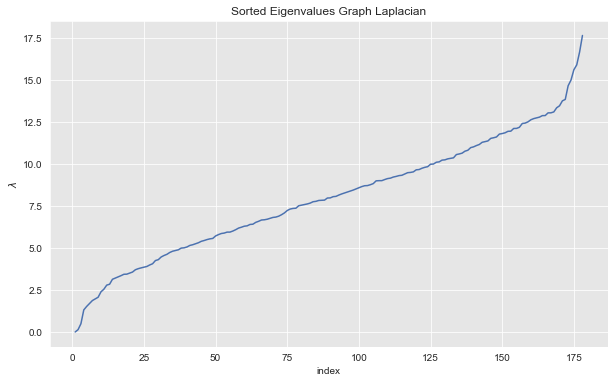

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)

ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

Vamos a ampliar la región del comienzo de la gráfica para ver ahora el comportamiento de los primeros autovalores, que son los que aportan más información.

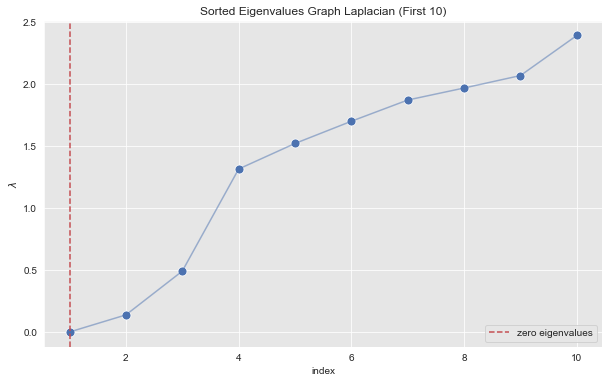

In [38]:
#elegimos el número de autovalores que queremos visualizar
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=1, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

**Cuestión 2:** ¿En qué ha cambiado este diagrama respecto al que has obtenido en la Parte 1 de esta práctica (Dataset de tres anillos)?
    
**Respuesta:** <font color = 'blue'> A diferencia del diagrama obtenido en la Parte 1, en este se observa una componente conexa -no tres-. </font>

Visualiza ahora los valores de las componentes del segundo autovector. Recuerda que por teoría sabes que este autovector sería la solución (la agrupación) al problema del corte de un grafo (si no hubieramos relajado las condiciones). En cualquier caso, en este problema puede aportar mucha información acerca del etiquetado de los datos.

In [39]:
indicesegundo = eigenvals_sorted_indices[1]
#imprimimos las dimensiones de este autovector para comprobar que son las esperadas
print(eigenvcts[:,indicesegundo].shape)

(178,)


Lo visualizamos en una gráfica

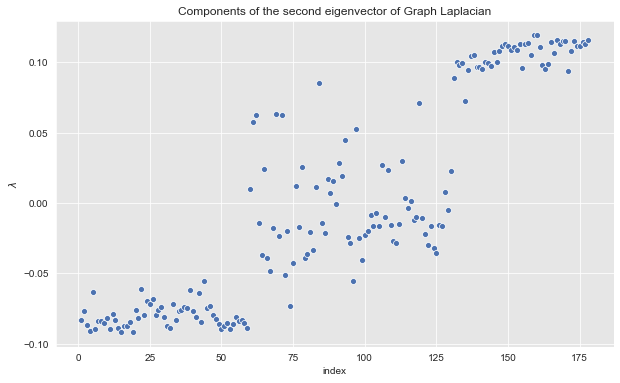

In [40]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvcts[:,indicesegundo], ax=ax2)
#ax2.scatter(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvcts[:,indicecuarto])
ax2.set(title='Components of the second eigenvector of Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');


**Cuestion4:** Recuerda cómo usamos los valores del autovector segundo en el agrupamiento espectral. ¿Qué puedes decir acerca de esta gráfica? ¿Podríamos a la vista de estos resultados dejar de utilizar más autovectores para agrupar los datos?

**Respuesta:** <font color = 'blue'> Podríamos dejar de utilizar más autovectores, ya que con esta componente ya se pueden diferenciar las 3 clases. </font>

Vamos a usar estos valores de las componentes del segundo autovector como solucion del problema de agrupamiento de nuestro dataset. 
Establece unos rangos de valores de las componentes que diferencien las fronteras de los grupos de componentes que ves en el gráfico y crea un vector con valores '0', '1', y '2' que representen la pertenencia de las componentes del autovector a un grupo en concreto. Es decir genera un vector en el que si su valor del índice '1' es '0', significa que la componente de índice '1' del autovector pertenece al agrupamiento '0'

In [41]:
etiquetas_espectrales = np.zeros(eigenvcts[:,indicesegundo].shape[0])

segundo_eigenvector = eigenvcts[:,indicesegundo]

for i in range(0,segundo_eigenvector.shape[0]):
    if segundo_eigenvector[i] < 0.1 and segundo_eigenvector[i] >= -0.05:
        etiquetas_espectrales[i] = 1
    elif segundo_eigenvector[i] >= 0.1:
        etiquetas_espectrales[i] = 2

print(etiquetas_espectrales)
    

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.]


Usamos estas etiquetas para visualizar ahora los datos del vino. Para ello, **usa los datos del Dataset original (normalizados)** y visualiza solo las caracteristicas de alcohol y acido málico coloreandolas con este vector de etiquetas procedente del agrupamiento espectral.

[Text(0.5, 1.0, 'Agrupamiento espectral con el segundo autovector')]

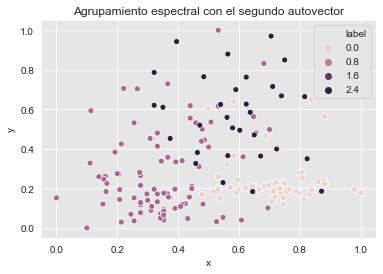

In [42]:
df = pd.DataFrame(np.array([wines_minmax[:,0],wines_minmax[:,1], etiquetas_espectrales]).transpose(), columns =['x', 'y', 'label'])

fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=df, hue='label', ax=ax)
ax.set(title='Agrupamiento espectral con el segundo autovector')

Compáralo con el verdadero agrupamiento, visualizando estas componentes del Dataset con la columna de las etiquetas verdaderas (recuerda que las tienes en un vector llamado wlabels)

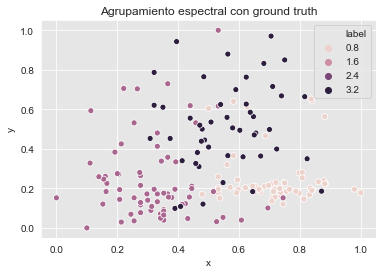

In [43]:
df = pd.DataFrame(np.array([wines_minmax[:,0],wines_minmax[:,1], wlabels]).transpose(), columns =['x', 'y', 'label'])

fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=df, hue='label', ax=ax)
ax.set(title='Agrupamiento espectral con ground truth');

**Cuestión 5:** Describe los resultados de las dos gráficas e indica tus conclusiones.

<font color = 'blue'>
Los resultados que hemos obtenido se aproximan bastante a la realidad.
</font>